In [23]:
from nn_lib import NeuralNetwork
import numpy
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = NeuralNetwork(input_nodes, output_nodes, hidden_nodes, learning_rate)
# n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
training_data_list = training_data_list[:10000]

In [48]:
# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

[[  7.10452775e-03]
 [  7.16038358e-03]
 [  8.68802410e-03]
 [  9.90521311e-01]
 [  5.93937649e-03]
 [  7.48254403e-03]
 [  1.71962169e-03]
 [  1.08529730e-02]
 [  6.23487633e-04]
 [  4.04540770e-03]]


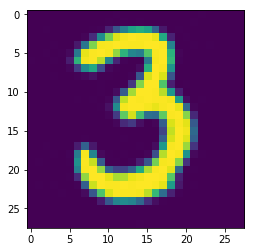

In [51]:
img = cv2.imread("7.jpg", 0)
img = 255-img
plt.imshow(img)
img = img.ravel()
img = ( numpy.asfarray(img) / 255 *0.99 ) + 0.01
print(n.query(img))